<a href="https://colab.research.google.com/github/PankajShukla/Standard-Data-Visualisation/blob/main/DataVizLibrary_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Standard Visualisation using seaborn**

Author : Pankaj Shukla

Date created : Apr 6, 2023

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

https://data.world/datafiniti/amazon-and-best-buy-electronics

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
os.chdir('drive/MyDrive/DataScientist/DataRepo/')

In [46]:
df = pd.read_csv('DatafinitiElectronicsProductsPricingData.csv')

In [47]:
pd.set_option('display.max_columns',500)

In [48]:
df.columns, df.primaryCategories.unique()

(Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
        'prices.condition', 'prices.currency', 'prices.dateSeen',
        'prices.isSale', 'prices.merchant', 'prices.shipping',
        'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
        'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
        'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
        'weight', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
        'Unnamed: 30'],
       dtype='object'),
 array(['Electronics', ' Siri Eyes Free', 'Electronics,Furniture',
        ' Intel Celeron', ' Apple CarPlay'], dtype=object))

In [49]:
singlecolors = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds']
multicolors = ['YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
palletes = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']

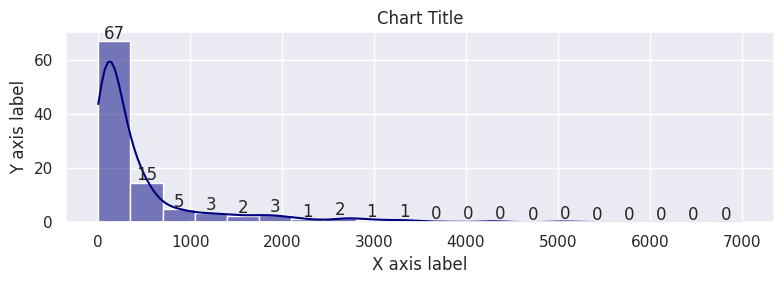

In [50]:

"""
-------------------------------------
Univariate Histogram
The charts provides percentage of data points falling into each bin
-------------------------------------
"""


"""
-------------------------------------
Inputs to Histogram
-------------------------------------
"""
column  = 'prices.amountMax'
xlabel = 'X axis label'
ylabel = 'Y axis label'
title   = 'Chart Title'
bins    =  20
figure_size_height = 3*1
figure_size_width  = 4*2
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True
color   =  'Navy'


"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Histogram
-------------------------------------
"""

fig, axes = plt.subplots()
sns.histplot(data=df, x=column, color=color, element="bars", bins=bins, stat='percent', kde=True, ax=axes)

for p in axes.patches:
  height = p.get_height()
  axes.text(x = p.get_x()+(p.get_width()/2),y = height+1,s = '{:.0f}'.format(height),ha = 'center')

axes.set(title=title)
axes.set(xlabel=xlabel, ylabel=ylabel)
axes.grid()


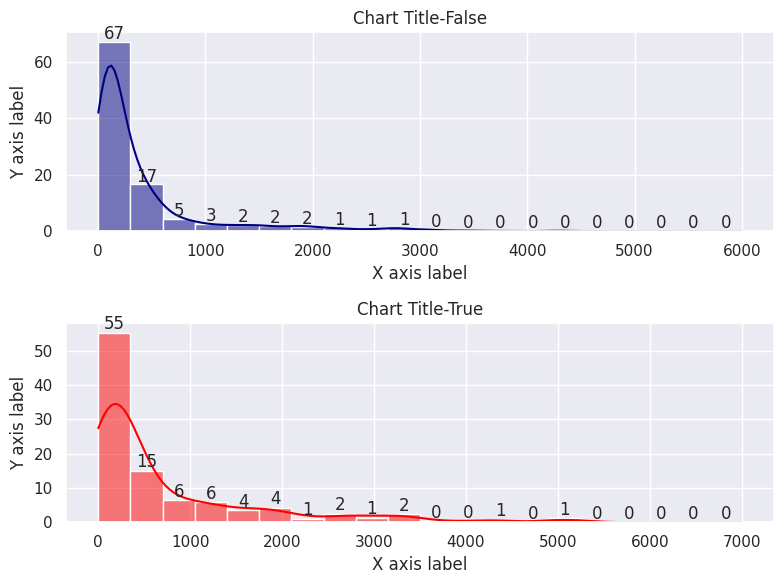

In [51]:

"""
-------------------------------------
Univariate Histograms split by a given category
The charts provides percentage of data points falling into each bin
-------------------------------------
"""


"""
-------------------------------------
Inputs to Histogram
-------------------------------------
"""
column  = 'prices.amountMax'
split_by_column = 'prices.isSale'
xlabel = 'X axis label'
ylabel = 'Y axis label'
title   = 'Chart Title'
split_values = df[split_by_column].unique()
plot_count = len(split_values)
bins    =  20
figure_size_height = 3*plot_count
figure_size_width  = 8
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True
colors   =  ['Navy','Red','Green','Orange','Purple','Blue']

"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Histogram
-------------------------------------
"""

if plot_count>=2 and plot_count<=6:

  fig, axes = plt.subplots(plot_count)

  for v in range(plot_count):
    data=df[df[split_by_column]==split_values[v]]
    sns.histplot(data=data, x=column, color=colors[v], element="bars", bins=bins, stat='percent', kde=True, ax=axes[v])

    for p in axes[v].patches:
      height = p.get_height()
      axes[v].text(x = p.get_x()+(p.get_width()/2),y = height+1,s = '{:.0f}'.format(height),ha = 'center')

    axes[v].set(title=title+"-"+str(split_values[v]))
    axes[v].set(xlabel=xlabel, ylabel=ylabel)
    axes[v].grid()

else:
  print('Variables between 2 and 6 are only allowed!')


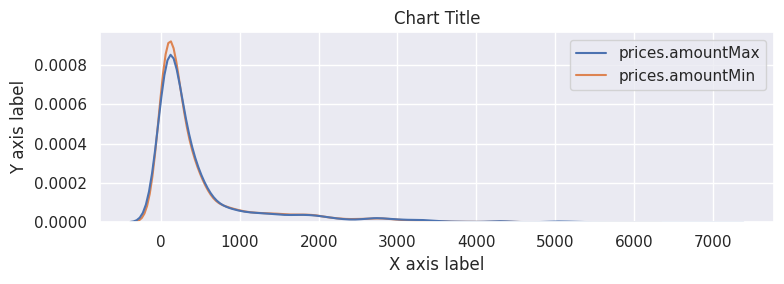

In [52]:

"""
-------------------------------------
Bivariate (KDE) Kernel density Estimate Plot 
-------------------------------------
"""


"""
-------------------------------------
Inputs to KDE
-------------------------------------
"""
column_list  = ['prices.amountMax','prices.amountMin']
xlabel = 'X axis label'
ylabel = 'Y axis label'
title   = 'Chart Title'
figure_size_height = 3*1
figure_size_width  = 4*2
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True


"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Histogram
-------------------------------------
"""

fig, axes = plt.subplots()

data = df[column_list]
sns.kdeplot(data=data, ax=axes)

axes.set(title=title)
axes.set(xlabel=xlabel, ylabel=ylabel)
axes.grid()


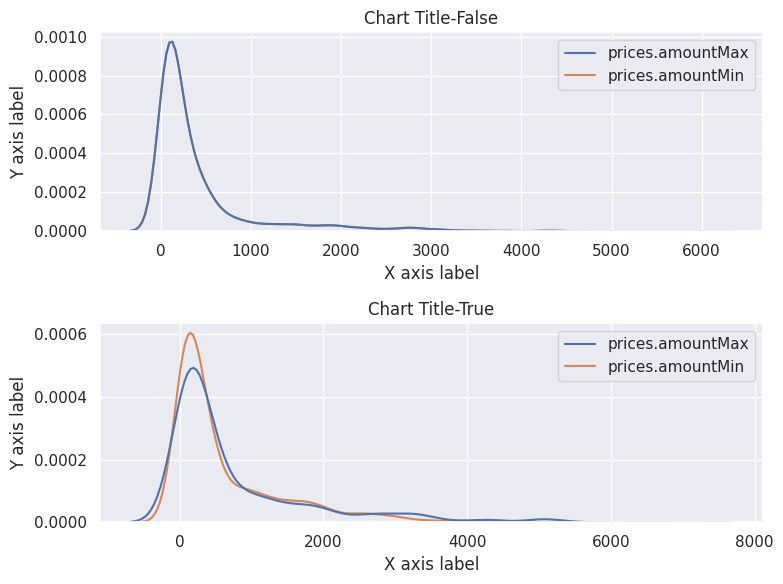

In [53]:


"""
-------------------------------------
Bivariate (KDE) Kernel density Estimate Plot split by a given category
-------------------------------------
"""


"""
-------------------------------------
Inputs to KDE
-------------------------------------
"""
column_list  = ['prices.amountMax','prices.amountMin']
split_by_column = 'prices.isSale'
xlabel = 'X axis label'
ylabel = 'Y axis label'
title   = 'Chart Title'
split_values = df[split_by_column].unique()
plot_count = len(split_values)
figure_size_height = 3*plot_count
figure_size_width  = 8
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True

"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Histogram
-------------------------------------
"""

if plot_count>=2 and plot_count<=6:

  fig, axes = plt.subplots(plot_count)

  for v in range(plot_count):
    data=df[df[split_by_column]==split_values[v]][column_list]
    sns.kdeplot(data=data, ax=axes[v])

    axes[v].set(title=title+"-"+str(split_values[v]))
    axes[v].set(xlabel=xlabel, ylabel=ylabel)
    axes[v].grid()

else:
  print('Variables between 2 and 6 are only allowed!')


In [54]:
data = df[[column]]
data.head()

,prices.amountMax
0,104.99
1,69.00
2,69.00
3,69.99
4,66.99


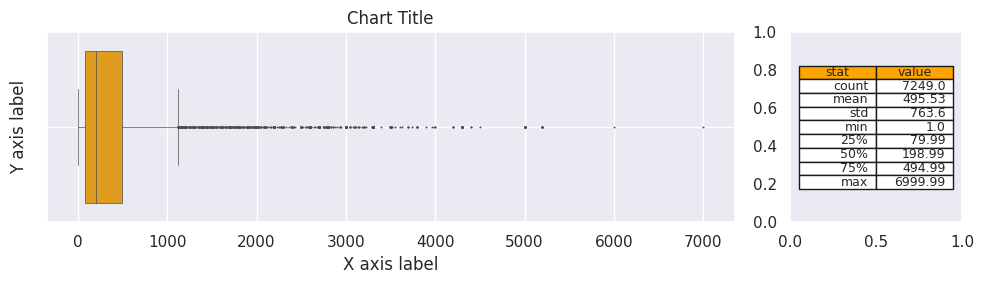

In [55]:

"""
-------------------------------------
Univariate Boxplots 
-------------------------------------
"""



"""
-------------------------------------
Inputs to BoxPlot
-------------------------------------
"""
column = 'prices.amountMax'
xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'
figure_size_height = 3*1
figure_size_width  = 4*2.5
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True
color   =  'Orange'

"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Boxplot
-------------------------------------
"""

fig, axes = plt.subplots(1,2, gridspec_kw={'width_ratios': [4,1]})

data = df[[column]]

tabulardata=data.describe().reset_index()
tabulardata.columns=["stat", "value"]
tabulardata['value']= round(tabulardata['value'],2)

sns.boxplot(data=data,x=column, orient="h", color=color ,fliersize=0.5, linewidth=0.5, whis=1.5, ax=axes[0])
axes[1].table(cellText= tabulardata.to_numpy(), colLabels=tuple(tabulardata.columns),loc ='center', colWidths=(0.45,0.45) , colColours =["Orange"]*2)

axes[0].set(title=title)
axes[0].set(xlabel=xlabel, ylabel=ylabel)
axes[0].grid()


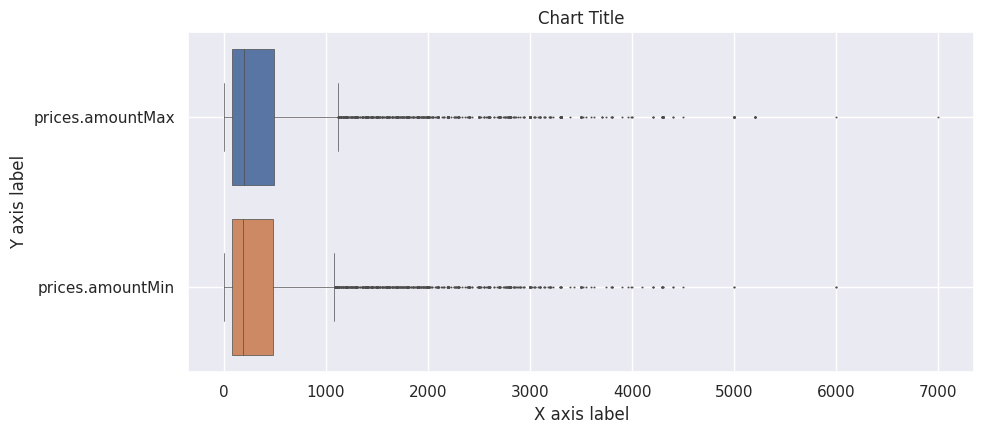

In [56]:

"""
-------------------------------------
Bivariate Boxplots 
-------------------------------------
"""



"""
-------------------------------------
Inputs to BoxPlot
-------------------------------------
"""
column_list  = ['prices.amountMax','prices.amountMin']
xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'
figure_size_height = 3*1.5
figure_size_width  = 4*2.5
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True

"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Boxplot
-------------------------------------
"""

fig, axes = plt.subplots()

data = df[column_list]

sns.boxplot(data=data, orient="h",fliersize=0.5, linewidth=0.5, whis=1.5, ax=axes)

axes.set(title=title)
axes.set(xlabel=xlabel, ylabel=ylabel)
axes.grid()


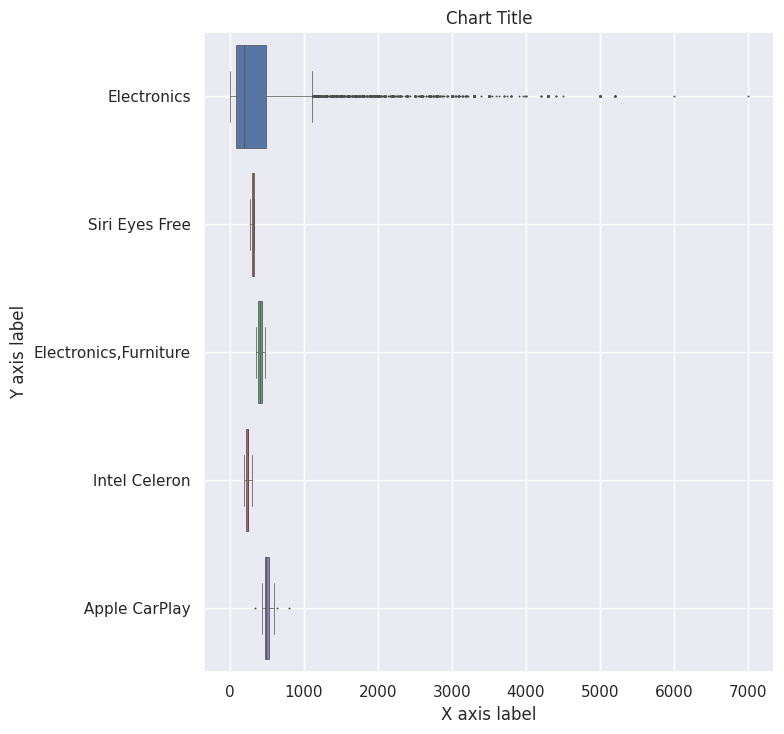

In [57]:

"""
-------------------------------------
Univariate Boxplots split by category
-------------------------------------
"""



"""
-------------------------------------
Inputs to BoxPlot
-------------------------------------
"""
column  = 'prices.amountMax'
split_by_column = 'primaryCategories'
xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'

plotsize_factor = df[split_by_column].nunique()

figure_size_height = 3*(plotsize_factor/2)
figure_size_width  = 4*2
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True

"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Boxplot
-------------------------------------
"""

fig, axes = plt.subplots()

sns.boxplot(data=df, x=column, y=split_by_column , orient="h", fliersize=0.5, linewidth=0.5, whis=1.5, ax=axes)

axes.set(title=title)
axes.set(xlabel=xlabel, ylabel=ylabel)
axes.grid()


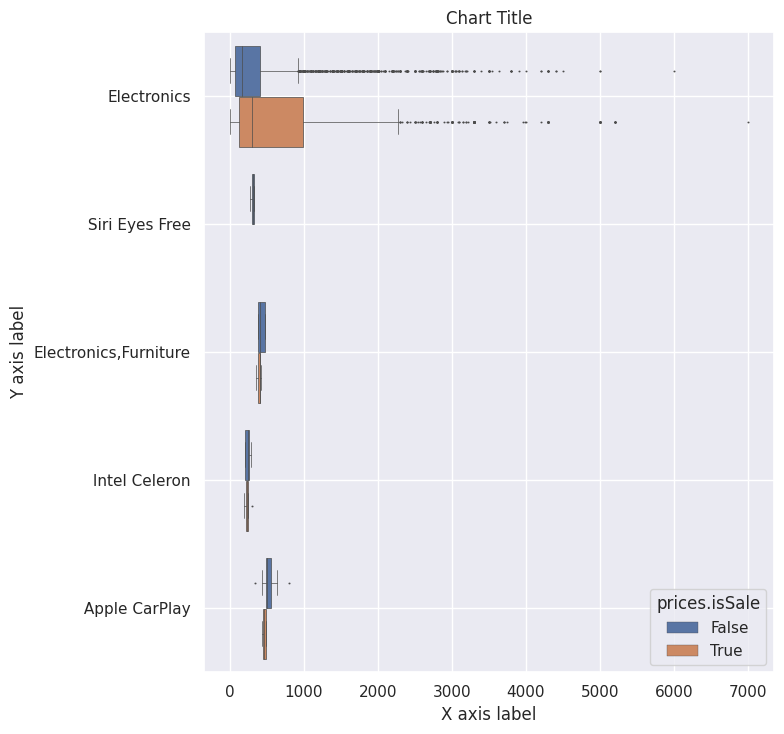

In [58]:

"""
-------------------------------------
Univariate Boxplots split by category
-------------------------------------
"""



"""
-------------------------------------
Inputs to BoxPlot
-------------------------------------
"""
column  = 'prices.amountMax'
split_by_column  = 'primaryCategories'
split_by_column2 = 'prices.isSale'
xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'

plotsize_factor  = df[split_by_column].nunique()
plotsize_factor2 = df[split_by_column2].nunique()

figure_size_height = 3*(plotsize_factor/2)*(plotsize_factor2/2)
figure_size_width  = 4*2
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True

"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Boxplot
-------------------------------------
"""

fig, axes = plt.subplots()

sns.boxplot(data=df, x=column, y=split_by_column, hue= split_by_column2, orient="h", fliersize=0.5, linewidth=0.5, whis=1.5, ax=axes)

axes.set(title=title)
axes.set(xlabel=xlabel, ylabel=ylabel)
axes.grid()


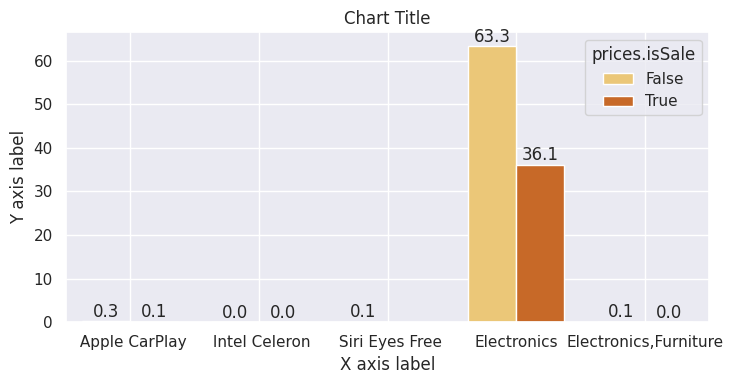

In [59]:

"""
-------------------------------------
Bar Plots
-------------------------------------
"""



"""
-------------------------------------
Inputs to BarPlot
-------------------------------------
"""

stat = 'percent'

column  = 'prices.amountMax'
split_by_column  = 'primaryCategories'
split_by_column2 = 'prices.isSale'
xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'

plotsize_factor  = df[split_by_column].nunique()
plotsize_factor2 = df[split_by_column2].nunique()

figure_size_height = 4
figure_size_width  = 3*(plotsize_factor/2)*(plotsize_factor2/2)
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True

"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot barplot
-------------------------------------
"""

fig, axes = plt.subplots()


if stat in ['min','max','mean','median','mode','std','count','nunique','sum']:
  data = df.groupby([split_by_column,split_by_column2]).agg(value = (column,stat)).reset_index()
  newcolumn =str(column)+"_"+str(stat)
  data.rename(columns= {'value' : newcolumn}, inplace=True)
elif stat in ['percent']:
  data = df.groupby([split_by_column,split_by_column2]).agg(value = (column,'sum')).reset_index()
  newcolumn =str(column)+"_"+str(stat)
  data.rename(columns= {'value' : newcolumn}, inplace=True)
  data[newcolumn]=round( (data[newcolumn]/data[newcolumn].sum())*100 ,1)
else:
  pass


sns.barplot(data=data, x=split_by_column, y=newcolumn, hue=split_by_column2, 
            orient="v",errorbar=None,palette=multicolors[0], width=0.75,  ax=axes)

for p in axes.patches:
  height = p.get_height()
  axes.text(x = p.get_x()+(p.get_width()/2),y = height+1,s = '{:.1f}'.format(height),ha = 'center')

axes.set(title=title)
axes.set(xlabel=xlabel, ylabel=ylabel)
axes.grid()


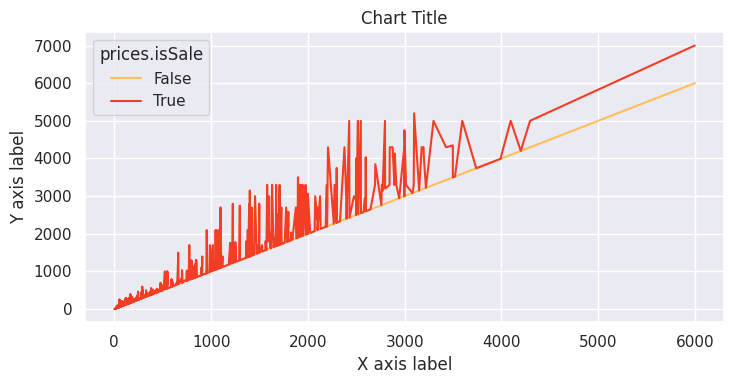

In [60]:

"""
-------------------------------------
Line Plots
-------------------------------------
"""



"""
-------------------------------------
Inputs to LinePlot
-------------------------------------
"""

column  = 'prices.amountMax'
column2  = 'prices.amountMin'
split_by_column  = 'primaryCategories'
split_by_column2 = 'prices.isSale'
xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'

plotsize_factor  = df[split_by_column].nunique()
plotsize_factor2 = df[split_by_column2].nunique()

figure_size_height = 4
figure_size_width  = 3*(plotsize_factor/2)*(plotsize_factor2/2)
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True

"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Lineplot
-------------------------------------
"""

fig, axes = plt.subplots()


if stat in ['min','max','mean','median','mode','std','count','nunique']:
  data = df.groupby([split_by_column,split_by_column2]).agg(value = (column,stat)).reset_index()
  newcolumn =str(column)+"_"+str(stat)
  data.rename(columns= {'value' : newcolumn}, inplace=True)
elif stat in ['percent']:
  data = df.groupby([split_by_column,split_by_column2]).agg(value = (column,'sum')).reset_index()
  newcolumn =str(column)+"_"+str(stat)
  data.rename(columns= {'value' : newcolumn}, inplace=True)
  data[newcolumn]=round( (data[newcolumn]/data[newcolumn].sum())*100 ,1)
else:
  pass

data = df[[split_by_column, split_by_column2, column, column2 ]]
sns.lineplot(data=data, x=column2, y=column, hue=split_by_column2, 
             orient="x", errorbar=None, palette=multicolors[1], ax=axes)

for p in axes.patches:
  height = p.get_height()
  axes.text(x = p.get_x()+(p.get_width()/2),y = height+1,s = '{:.1f}'.format(height),ha = 'center')

axes.set(title=title)
axes.set(xlabel=xlabel, ylabel=ylabel)
axes.grid()


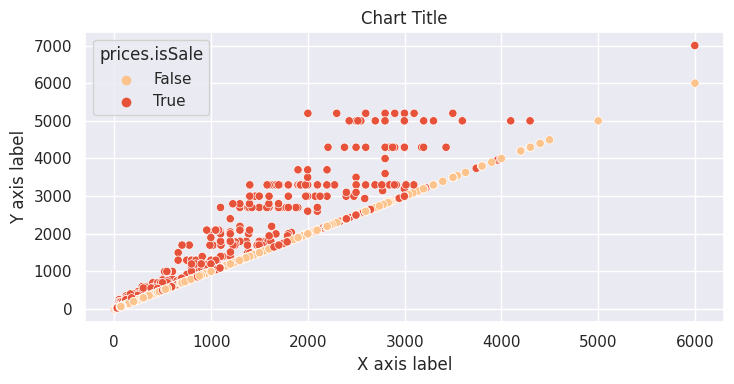

In [61]:

"""
-------------------------------------
Scatter Plots
-------------------------------------
"""



"""
-------------------------------------
Inputs to ScatterPlot
-------------------------------------
"""

column   = 'prices.amountMax'
column2  = 'prices.amountMin'
split_by_column  = 'primaryCategories'
split_by_column2 = 'prices.isSale'
xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'

plotsize_factor  = df[split_by_column].nunique()
plotsize_factor2 = df[split_by_column2].nunique()

figure_size_height = 4
figure_size_width  = 3*(plotsize_factor/2)*(plotsize_factor2/2)
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True

"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Sactterplot
-------------------------------------
"""

fig, axes = plt.subplots()

data = df[[split_by_column, split_by_column2, column, column2 ]]
sns.scatterplot(data=data, x=column2, y=column, hue=split_by_column2, palette=multicolors[2],ax=axes)

for p in axes.patches:
  height = p.get_height()
  axes.text(x = p.get_x()+(p.get_width()/2),y = height+1,s = '{:.1f}'.format(height),ha = 'center')

axes.set(title=title)
axes.set(xlabel=xlabel, ylabel=ylabel)
axes.grid()


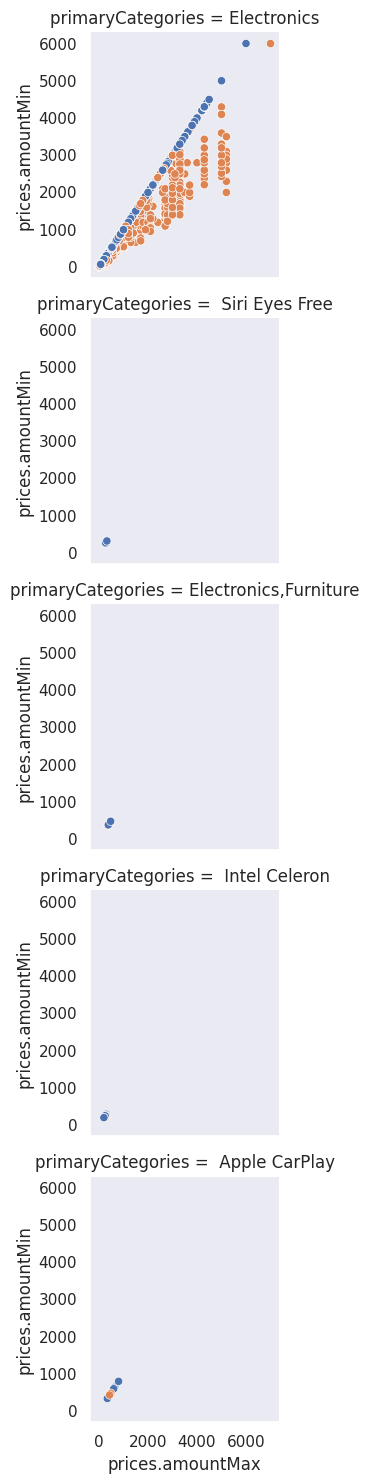

In [62]:

"""
-------------------------------------
Facet Grid

Multi-plot grid for plotting conditional relationships
For eg : Consider we want to views sales at a store across time of day split by Female and Male customers. 
We can use two line plots (side by side - one for Maile, other for Female) to view relationship between time of day (x axis) and sales (y axis)
-------------------------------------
"""




"""
-------------------------------------
Inputs to ScatterPlot
-------------------------------------
"""

column   = 'prices.amountMax'
column2  = 'prices.amountMin'
split_by_column  = 'primaryCategories'
split_by_column2 = 'prices.isSale'
view = "Vertical" 


xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'

plotsize_factor  = df[split_by_column].nunique()
plotsize_factor2 = df[split_by_column2].nunique()

figure_size_height = 4
figure_size_width  = 3*(plotsize_factor/2)*(plotsize_factor2/2)
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True


"""
-------------------------------------
Plot Sactterplot
-------------------------------------
"""


data = df[[split_by_column, split_by_column2, column, column2 ]]

if view =="Horizontal":
  fg = sns.FacetGrid(data, col=split_by_column)
  fg.map_dataframe(sns.scatterplot, x=column, y=column2, hue=split_by_column2)

elif view =="Vertical":
  fg = sns.FacetGrid(data, row=split_by_column)
  fg.map_dataframe(sns.scatterplot, x=column, y=column2, hue=split_by_column2) 
else:
  print('Please add view parameter!')


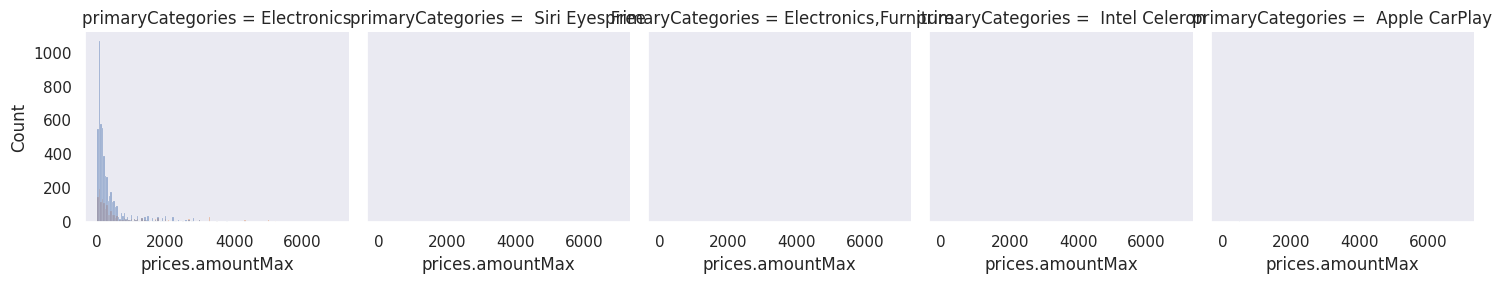

In [63]:
"""
-------------------------------------
Inputs to Histplot
-------------------------------------
"""


column   = 'prices.amountMax'
split_by_column  = 'primaryCategories'
split_by_column2 = 'prices.isSale'

view = "Horizontal" 

xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'


plotsize_factor  = df[split_by_column].nunique()

figure_size_height = 4
figure_size_width  = 3*(plotsize_factor/2)
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True



"""
-------------------------------------
Plot Sactterplot
-------------------------------------
"""


data = df[[split_by_column, split_by_column2,  column ]]

if view =="Horizontal":
  fg = sns.FacetGrid(data, col=split_by_column)
  fg.map_dataframe(sns.histplot, x=column, hue=split_by_column2)

elif view =="Vertical":
  fg = sns.FacetGrid(data, row=split_by_column)
  fg.map_dataframe(sns.histplot, x=column, hue=split_by_column2)
else:
  print('Please add view parameter!')


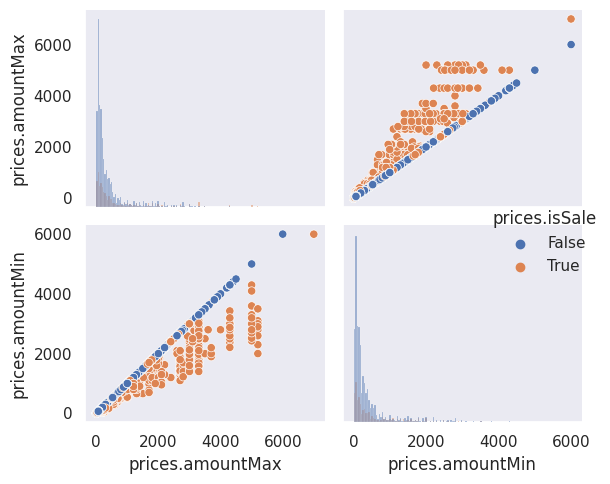

In [64]:

"""
-------------------------------------
Pair Plots

Plots pairwise relationships in a dataset (for Numerical variables)

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across 
the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: 
a univariate distribution plot is drawn to show the marginal distribution of the data in each column.
-------------------------------------
"""

"""
-------------------------------------
Inputs to Histplot
-------------------------------------
"""


column    = 'prices.amountMax'
column2   = 'prices.amountMin'
split_by_column  = 'primaryCategories'
split_by_column2 = 'prices.isSale'

xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'

plotsize_factor  = df[split_by_column].nunique()

figure_size_height = 4
figure_size_width  = 3*(plotsize_factor/2)
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True



data = df[[split_by_column, split_by_column2,  column, column2 ]]
sns.pairplot(data, hue=split_by_column2, kind='scatter' , diag_kind='hist')



<Axes: xlabel='prices.isSale', ylabel='primaryCategories'>

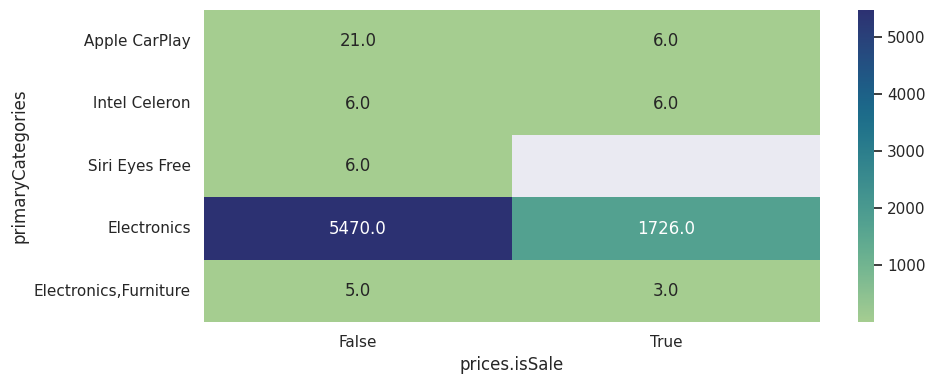

In [115]:

"""
-------------------------------------
Heatmap Plots

To Plot rectangular data as a color-encoded matrix.
-------------------------------------
"""


"""
-------------------------------------
Inputs to Heatmap
-------------------------------------
"""

stat = 'count'

column_list  = ['prices.amountMax']
split_by_column  = 'primaryCategories'
split_by_column2 = 'prices.isSale'
xlabel = 'X axis label'
ylabel = 'Y axis label'
title  = 'Chart Title'

plotsize_factor   = df[split_by_column].nunique()

if  split_by_column2 is None:
  plotsize_factor2  = 1
else:
  plotsize_factor2  = df[split_by_column2].nunique()

figure_size_height = 4
figure_size_width  = 4*(plotsize_factor/2)*(plotsize_factor2/2)
plt.rcParams["figure.figsize"] = (figure_size_width,figure_size_height)
plt.rcParams["figure.autolayout"] = True

"""
-------------------------------------
Set theme of the plot
-------------------------------------
"""
sns.set(style="ticks")
sns.set_theme(style="dark", palette=None)


"""
-------------------------------------
Plot Heatmap
-------------------------------------
"""

fig, axes = plt.subplots()


if stat in ['min','max','mean','median','mode','std','count','nunique','sum']:
  if len(column_list) ==1 and split_by_column2 is not None:
    data = df.pivot_table(index=split_by_column, columns=split_by_column2, values=column, aggfunc=stat,dropna=False,fill_value=None)
  elif len(column_list)==1 and split_by_column2 is None:
    data = df.pivot_table(index=split_by_column, columns=None, values=column_list, aggfunc=stat,dropna=False,fill_value=None)
  elif len(column_list)>1:
    data = df.pivot_table(index=split_by_column, columns=None, values=column_list, aggfunc=stat,dropna=False,fill_value=None)
  else:
    print('Parameter - column list is missing')
else:
  print('Parameter - stat is missing')

sns.heatmap(data, annot=True, cmap="crest", fmt='.1f', ax=axes)


Code Ends